### Rolling Shutter DiffuserCam

This notebook uses the FISTA algorithm to deconvolute images taken with the Rolling Shutter DiffuserCam in order to recover 2D images and 3D video. The code relies on helper functions, which are included in the Github repository. In the next few cells, we import the required libraries and files. In addition, this code only works when the notebook is set to use a GPU via Edit>Notebook Settings.

In [1]:
from google.colab import drive
from os.path import join

ROOT  = '/content/drive'
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use the following cell to define filepaths from Google Drive to your images and helper code. Once you've connected Google Drive, you can also use the navigator on the left and copy the filepath directly.

In [2]:
PATH_TO_HELPER = '/content/drive/My Drive/DiffuserCam/helper'
PATH_TO_SUBHELPER = '/content/drive/My Drive/DiffuserCam/helper/helper_functions/'

PSF_PATH = "/content/drive/MyDrive/DiffuserCam/example/psf.png"
IMG_PATH = "/content/drive/MyDrive/DiffuserCam/tests/test23/1.png"

In [3]:
import matplotlib.pyplot as plt
import scipy.io
import sys
sys.path.append(PATH_TO_HELPER)
sys.path.append(PATH_TO_SUBHELPER)
from helper import *
from utils import *
from PIL import Image
import numpy as numpy
import imageio
import cv2
import cupy as np

### Running the 3D Algorithm

In [ ]:
img = image_RS(PSF_PATH, IMG_PATH)

In [ ]:
# Number of reconstruction iterations
img.iters = 200
# Number of frames to reconstruct
img.num_frames = 30
# Amount to downsize image (saves VRAM)
img.resize_factor = 1/10

img.prox_method = 'tv' # options: 'non-neg', 'tv', 'native'
# tv tuning parameters (spatial and temporal)
img.tv_lambda = 3e-5
img.tv_lambdaw = 50

In [ ]:
img.run()

In [ ]:
SAVE_FILEPATH = ''
img.save(SAVE_FILEPATH)

### Running 2D Reconstruction

In [4]:
img = image_2D(PSF_PATH, IMG_PATH)

In [9]:
# Number of reconstruction iterations
img.iters = 500
# Amount to downsize image (saves VRAM)
img.resize_factor = 1/8

img.prox_method = 'tv' # options: 'non-neg', 'tv'
# tv tuning parameters (spatial and temporal)
img.tv_lambda = 3e-4 * 1000
img.tv_lambdaw = 50

5.172739855483021e-07 1.2992316436650936e-06
5.194243219323438e-07 1.2992316436650936e-06
4.756230218538391e-07 1.2992316436650936e-06
4.794388441558291e-07 1.2992316436650936e-06
iteration:  0  loss:  609755.060317548


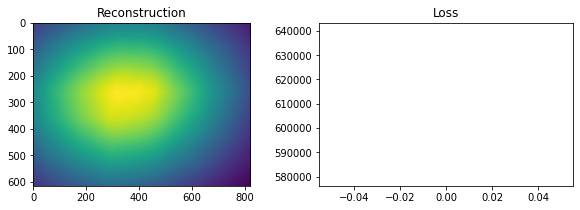

1.0004878112703407e-06 1.2992316436650936e-06
1.0041762587245292e-06 1.2992316436650936e-06
9.160976218985286e-07 1.2992316436650936e-06
9.23507074495781e-07 1.2992316436650936e-06
1.6110214165441152e-06 1.2992316436650936e-06
1.6160687332903778e-06 1.2992316436650936e-06
1.4675454331432772e-06 1.2992316436650936e-06
1.479535167694711e-06 1.2992316436650936e-06
2.318528967769023e-06 1.2992316436650936e-06
2.3259794345665015e-06 1.2992316436650936e-06
2.1071093331264607e-06 1.2992316436650936e-06
2.1186366113111485e-06 1.2992316436650936e-06
3.0916758066367076e-06 1.2992316436650936e-06
3.1015472514312624e-06 1.2992316436650936e-06
2.9087729432512226e-06 1.2992316436650936e-06
2.8850636405667446e-06 1.2992316436650936e-06
3.900416436847853e-06 1.2992316436650936e-06
3.912359691962965e-06 1.2992316436650936e-06
3.8145704844549663e-06 1.2992316436650936e-06
3.7903736113653235e-06 1.2992316436650936e-06
4.716408258971637e-06 1.2992316436650936e-06
4.729861602519811e-06 1.2992316436650936e-

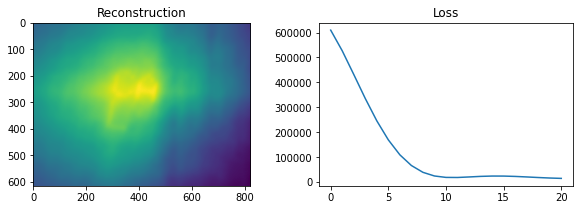

2.121461822152182e-05 1.2992316436650936e-06
2.123064381918986e-05 1.2992316436650936e-06
2.858470760602266e-05 1.2992316436650936e-06
2.863972068907281e-05 1.2992316436650936e-06
2.2746550877920617e-05 1.2992316436650936e-06
2.275658307865297e-05 1.2992316436650936e-06
3.072332502182916e-05 1.2992316436650936e-06
3.078441823888471e-05 1.2992316436650936e-06
2.4317637786819635e-05 1.2992316436650936e-06
2.4319234140729112e-05 1.2992316436650936e-06
3.294179589532296e-05 1.2992316436650936e-06
3.300923236556986e-05 1.2992316436650936e-06
2.5929190188231045e-05 1.2992316436650936e-06
2.5919828056698446e-05 1.2992316436650936e-06
3.5242087215708565e-05 1.2992316436650936e-06
3.531613575971262e-05 1.2992316436650936e-06
2.758272707662543e-05 1.2992316436650936e-06
2.7559867303836752e-05 1.2992316436650936e-06
3.762574817835734e-05 1.2992316436650936e-06
3.770668852734363e-05 1.2992316436650936e-06
2.9279908897732873e-05 1.2992316436650936e-06
2.9241047294291008e-05 1.2992316436650936e-06
4

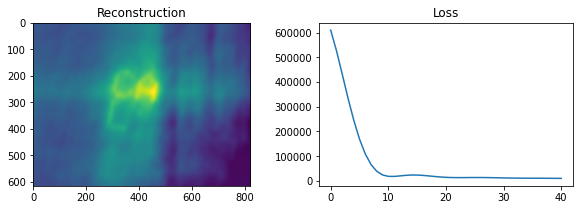

6.097881501210274e-05 1.2992316436650936e-06
6.048772043267928e-05 1.2992316436650936e-06
8.714861597204179e-05 1.2992316436650936e-06
8.73954288477791e-05 1.2992316436650936e-06
6.354453530523678e-05 1.2992316436650936e-06
6.301492933246464e-05 1.2992316436650936e-06
9.093004002385383e-05 1.2992316436650936e-06
9.119174241196556e-05 1.2992316436650936e-06
6.616684630587907e-05 1.2992316436650936e-06
6.559810422053223e-05 1.2992316436650936e-06
9.478936594027628e-05 1.2992316436650936e-06
9.506658050330593e-05 1.2992316436650936e-06
6.884511256617842e-05 1.2992316436650936e-06
6.823661191445228e-05 1.2992316436650936e-06
9.872612081568945e-05 1.2992316436650936e-06
9.901948276506169e-05 1.2992316436650936e-06
7.15786152385105e-05 1.2992316436650936e-06
7.09297197391065e-05 1.2992316436650936e-06
0.00010273975403635737 1.2992316436650936e-06
0.00010304991204446131 1.2992316436650936e-06
7.436657135077797e-05 1.2992316436650936e-06
7.367660937763225e-05 1.2992316436650936e-06
0.000106829

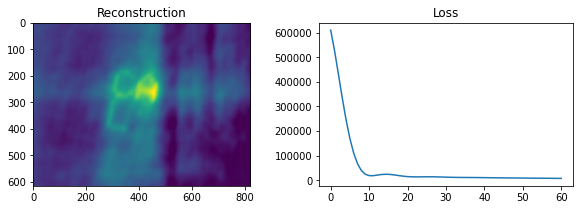

0.00012217092316638142 1.2992316436650936e-06
0.00012074963165856148 1.2992316436650936e-06
0.00017672061339914753 1.2992316436650936e-06
0.00017740267911049788 1.2992316436650936e-06
0.00012572932078711238 1.2992316436650936e-06
0.00012425035535765493 1.2992316436650936e-06
0.000181911630344863 1.2992316436650936e-06
0.00018262446808834802 1.2992316436650936e-06
0.00012933256943069643 1.2992316436650936e-06
0.0001277949168949041 1.2992316436650936e-06
0.00018716610231306555 1.2992316436650936e-06
0.00018791072959419735 1.2992316436650936e-06
0.00013298072948789733 1.2992316436650936e-06
0.0001313834269083915 1.2992316436650936e-06
0.00019248386137912845 1.2992316436650936e-06
0.0001932613161583463 1.2992316436650936e-06
0.00013667390029793928 1.2992316436650936e-06
0.00013501604204622513 1.2992316436650936e-06
0.00019786479366313488 1.2992316436650936e-06
0.00019867613332456242 1.2992316436650936e-06
0.0001404121988488763 1.2992316436650936e-06
0.00013869294295126643 1.299231643665093

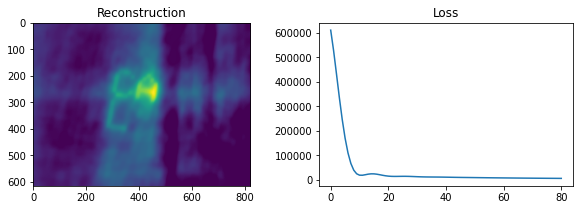

0.000201916893923176 1.2992316436650936e-06
0.0001991970603980629 1.2992316436650936e-06
0.00029249201078644654 1.2992316436650936e-06
0.0002938755526061066 1.2992316436650936e-06
0.00020637001776376002 1.2992316436650936e-06
0.0002035780829951624 1.2992316436650936e-06
0.0002989265874752894 1.2992316436650936e-06
0.0003003362988758544 1.2992316436650936e-06
0.00021086480071351194 1.2992316436650936e-06
0.0002079999045778293 1.2992316436650936e-06
0.00030541368197573054 1.2992316436650936e-06
0.0003068531288837877 1.2992316436650936e-06
0.0002154007037086756 1.2992316436650936e-06
0.00021246188678951503 1.2992316436650936e-06
0.00031195252215303885 1.2992316436650936e-06
0.0003134253781523197 1.2992316436650936e-06
0.00021997719118747376 1.2992316436650936e-06
0.00021696337955193592 1.2992316436650936e-06
0.00031854235255616064 1.2992316436650936e-06
0.0003200524109718127 1.2992316436650936e-06
0.00022459372812926409 1.2992316436650936e-06
0.0002215037313249087 1.2992316436650936e-06
0

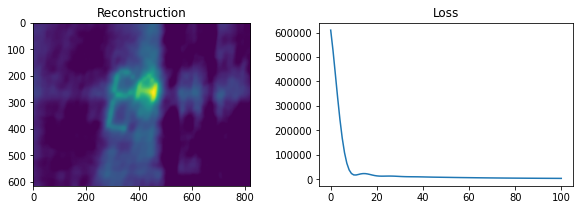

0.0002983322430686818 1.2992316436650936e-06
0.0002938971599000997 1.2992316436650936e-06
0.00043038070098976657 1.2992316436650936e-06
0.00043312472726995504 1.2992316436650936e-06
0.00030353146625258375 1.2992316436650936e-06
0.0002989911297786495 1.2992316436650936e-06
0.00043776644099712935 1.2992316436650936e-06
0.00044061064967477066 1.2992316436650936e-06
0.00030876457284338866 1.2992316436650936e-06
0.0003041171275802183 1.2992316436650936e-06
0.00044524183340599816 1.2992316436650936e-06
0.00044814355532452624 1.2992316436650936e-06
0.00031403133608660927 1.2992316436650936e-06
0.0003092750197774743 1.2992316436650936e-06
0.0004527628140976997 1.2992316436650936e-06
0.0004557230436589609 1.2992316436650936e-06
0.0003193315312405455 1.2992316436650936e-06
0.0003144646832827161 1.2992316436650936e-06
0.00046032895860779734 1.2992316436650936e-06
0.000463348706651272 1.2992316436650936e-06
0.000324664933086393 1.2992316436650936e-06
0.0003196860018238838 1.2992316436650936e-06
0.

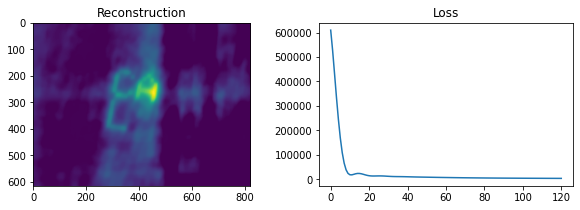

0.00040850237669857255 1.2992316436650936e-06
0.00040173356599136265 1.2992316436650936e-06
0.0005871654035338109 1.2992316436650936e-06
0.0005912907578874424 1.2992316436650936e-06
0.00041433836622307253 1.2992316436650936e-06
0.0004074458575812801 1.2992316436650936e-06
0.000595432008373876 1.2992316436650936e-06
0.0005996371991511038 1.2992316436650936e-06
0.00042020420938559765 1.2992316436650936e-06
0.00041318737774281004 1.2992316436650936e-06
0.0006037362302479608 1.2992316436650936e-06
0.0006080226405515507 1.2992316436650936e-06
0.00042609974553118793 1.2992316436650936e-06
0.00041895788504027394 1.2992316436650936e-06
0.0006120777376201865 1.2992316436650936e-06
0.0006164467599572125 1.2992316436650936e-06
0.00043202481399405937 1.2992316436650936e-06
0.0004247571345594594 1.2992316436650936e-06
0.0006204562088243082 1.2992316436650936e-06
0.0006249092434603443 1.2992316436650936e-06
0.00043797925437308565 1.2992316436650936e-06
0.0004305848791976244 1.2992316436650936e-06
0.

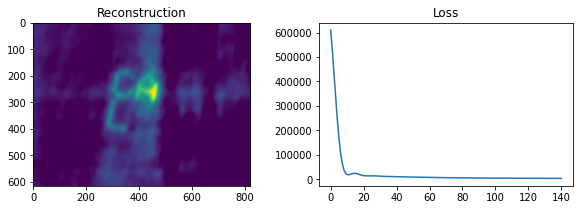

0.0005307066737181977 1.2992316436650936e-06
0.0005212637745034514 1.2992316436650936e-06
0.0007593117934199865 1.2992316436650936e-06
0.0007652947020826613 1.2992316436650936e-06
0.0005371077790508798 1.2992316436650936e-06
0.000527517473912599 1.2992316436650936e-06
0.0007682782191306547 1.2992316436650936e-06
0.000774367420013238 1.2992316436650936e-06
0.0005435352288911993 1.2992316436650936e-06
0.0005337962659731919 1.2992316436650936e-06
0.0007772773510808917 1.2992316436650936e-06
0.0007834739507351739 1.2992316436650936e-06
0.0005499888335605035 1.2992316436650936e-06
0.0005401000070268436 1.2992316436650936e-06
0.0007863090263572001 1.2992316436650936e-06
0.0007926141072658318 1.2992316436650936e-06
0.0005564684035716956 1.2992316436650936e-06
0.0005464285587017509 1.2992316436650936e-06
0.0007953730853665235 1.2992316436650936e-06
0.000801787706996764 1.2992316436650936e-06
0.0005629737497629631 1.2992316436650936e-06
0.0005527817874558894 1.2992316436650936e-06
0.00080446937

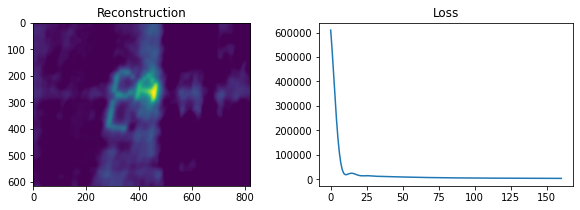

0.0006635182131107502 1.2992316436650936e-06
0.0006509494561867485 1.2992316436650936e-06
0.0009446700459508116 1.2992316436650936e-06
0.0009529688114714212 1.2992316436650936e-06
0.0006704099783755085 1.2992316436650936e-06
0.0006576783887099711 1.2992316436650936e-06
0.0009542592008572146 1.2992316436650936e-06
0.0009626835117483523 1.2992316436650936e-06
0.0006773242127684491 1.2992316436650936e-06
0.0006644293813146095 1.2992316436650936e-06
0.0009638775935718668 1.2992316436650936e-06
0.0009724283449874416 1.2992316436650936e-06
0.0006842607243158526 1.2992316436650936e-06
0.000671202233105263 1.2992316436650936e-06
0.0009735250283516114 1.2992316436650936e-06
0.0009822031137730965 1.2992316436650936e-06
0.0006912193265646052 1.2992316436650936e-06
0.0006779967382851195 1.2992316436650936e-06
0.0009832013087427167 1.2992316436650936e-06
0.0009920076200724084 1.2992316436650936e-06
0.0006981998372183395 1.2992316436650936e-06
0.0006848126872990217 1.2992316436650936e-06
0.000992906

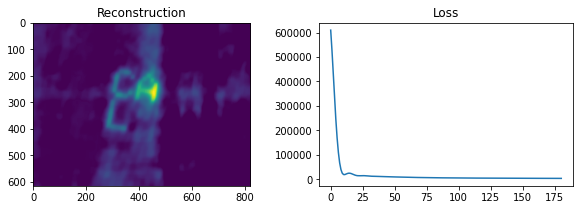

0.0008054136660919877 1.2992316436650936e-06
0.0007894759492826176 1.2992316436650936e-06
0.0011417873726305367 1.2992316436650936e-06
0.001152764003017443 1.2992316436650936e-06
0.0008127199717295632 1.2992316436650936e-06
0.000796605009916235 1.2992316436650936e-06
0.0011519247660577029 1.2992316436650936e-06
0.0011630440614534454 1.2992316436650936e-06
0.0008200450391301375 1.2992316436650936e-06
0.0008037517882835249 1.2992316436650936e-06
0.0011620876168925475 1.2992316436650936e-06
0.0011733503304485638 1.2992316436650936e-06
0.0008273886754180333 1.2992316436650936e-06
0.0008109160852997715 1.2992316436650936e-06
0.001172275743232362 1.2992316436650936e-06
0.0011836826158686082 1.2992316436650936e-06
0.0008347506876428085 1.2992316436650936e-06
0.0008180977059304987 1.2992316436650936e-06
0.0011824889631573264 1.2992316436650936e-06
0.001194040724469481 1.2992316436650936e-06
0.0008421308839304174 1.2992316436650936e-06
0.0008252964584177703 1.2992316436650936e-06
0.001192727095

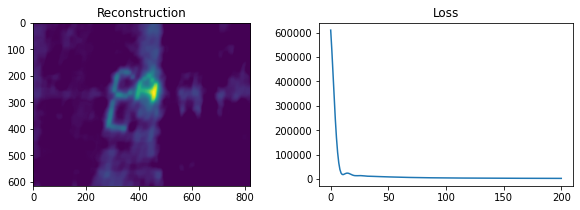

0.0009548943786770044 1.2992316436650936e-06
0.0009352121538429015 1.2992316436650936e-06
0.0013491695066682522 1.2992316436650936e-06
0.001363131420736092 1.2992316436650936e-06
0.0009625419700112822 1.2992316436650936e-06
0.0009426612205387701 1.2992316436650936e-06
0.0013597826513257424 1.2992316436650936e-06
0.0013739005334031142 1.2992316436650936e-06
0.0009702049795829555 1.2992316436650936e-06
0.0009501245856119122 1.2992316436650936e-06
0.001370417800807423 1.2992316436650936e-06
0.0013846922363901038 1.2992316436650936e-06
0.0009778832723112345 1.2992316436650936e-06
0.000957602108861834 1.2992316436650936e-06
0.0013810747867693469 1.2992316436650936e-06
0.0013955063572272987 1.2992316436650936e-06
0.0009855767156923463 1.2992316436650936e-06
0.0009650936512409564 1.2992316436650936e-06
0.0013917534410870145 1.2992316436650936e-06
0.0014063427243686732 1.2992316436650936e-06
0.000993285178358738 1.2992316436650936e-06
0.0009725990736993273 1.2992316436650936e-06
0.001402453597

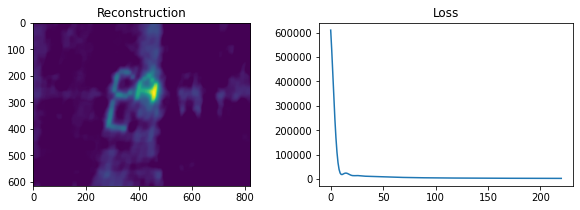

0.0011106273088366664 1.2992316436650936e-06
0.0010867483809983943 1.2992316436650936e-06
0.0015654293679827308 1.2992316436650936e-06
0.0015826194507137874 1.2992316436650936e-06
0.0011185586095546563 1.2992316436650936e-06
0.0010944560310510206 1.2992316436650936e-06
0.0015764525996337425 1.2992316436650936e-06
0.0015938100222763875 1.2992316436650936e-06
0.001126502710057352 1.2992316436650936e-06
0.0011021750190978858 1.2992316436650936e-06
0.001587494831228435 1.2992316436650936e-06
0.001605020149739099 1.2992316436650936e-06
0.0011344594671550147 1.2992316436650936e-06
0.001109905190913955 1.2992316436650936e-06
0.0015985559409042124 1.2992316436650936e-06
0.001616249704238514 1.2992316436650936e-06
0.0011424287369832396 1.2992316436650936e-06
0.0011176463943600482 1.2992316436650936e-06
0.0016096358102277463 1.2992316436650936e-06
0.0016274985574742525 1.2992316436650936e-06
0.0011504103787861257 1.2992316436650936e-06
0.0011253984803470845 1.2992316436650936e-06
0.0016207343251

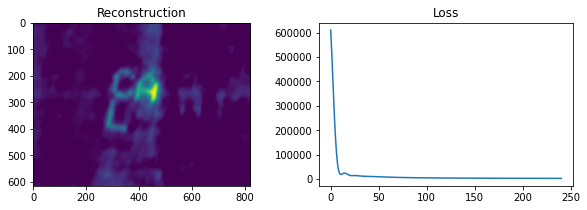

0.00127152509029557 1.2992316436650936e-06
0.0012428867578413954 1.2992316436650936e-06
0.001789376172407492 1.2992316436650936e-06
0.001810000747532237 1.2992316436650936e-06
0.0012796858133303577 1.2992316436650936e-06
0.0012507931466750988 1.2992316436650936e-06
0.0018007584965316532 1.2992316436650936e-06
0.001821558028632498 1.2992316436650936e-06
0.0012878565739023555 1.2992316436650936e-06
0.001258707932017971 1.2992316436650936e-06
0.0018121576595104328 1.2992316436650936e-06
0.0018331322428117027 1.2992316436650936e-06
0.0012960372457860557 1.2992316436650936e-06
0.0012666309676813946 1.2992316436650936e-06
0.0018235735474767787 1.2992316436650936e-06
0.0018447232424316942 1.2992316436650936e-06
0.00130422770698642 1.2992316436650936e-06
0.0012745621062492684 1.2992316436650936e-06
0.001835006043958813 1.2992316436650936e-06
0.0018563308774827017 1.2992316436650936e-06
0.0013124278384473115 1.2992316436650936e-06
0.0012825011989183292 1.2992316436650936e-06
0.00184645503158149

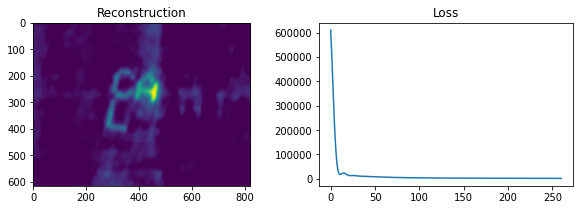

0.0014365144666523657 1.2992316436650936e-06
0.001402439837068687 1.2992316436650936e-06
0.0020200907451646158 1.2992316436650936e-06
0.002044191174839411 1.2992316436650936e-06
0.001444854418590478 1.2992316436650936e-06
0.0014104858615978217 1.2992316436650936e-06
0.0020317880732623394 1.2992316436650936e-06
0.0020560583578475254 1.2992316436650936e-06
0.0014532022254450814 1.2992316436650936e-06
0.0014185373378624352 1.2992316436650936e-06
0.002043499967825335 1.2992316436650936e-06
0.002067939448015291 1.2992316436650936e-06
0.001461557782104418 1.2992316436650936e-06
0.0014265941278842175 1.2992316436650936e-06
0.0020552263152970127 1.2992316436650936e-06
0.0020798342923950557 1.2992316436650936e-06
0.0014699209841642646 1.2992316436650936e-06
0.0014346560961265515 1.2992316436650936e-06
0.002066967001518517 1.2992316436650936e-06
0.0020917427377481657 1.2992316436650936e-06
0.0014782917288213555 1.2992316436650936e-06
0.001442723108716458 1.2992316436650936e-06
0.0020787219123382

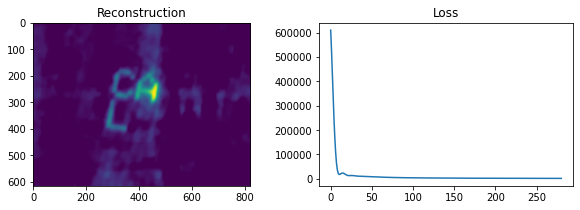

0.0016046871645241613 1.2992316436650936e-06
0.0015642488156803447 1.2992316436650936e-06
0.00225813770886771 1.2992316436650936e-06
0.0022840025049856542 1.2992316436650936e-06
0.0016131643567879196 1.2992316436650936e-06
0.0015723800643285923 1.2992316436650936e-06
0.0022702484363252484 1.2992316436650936e-06
0.0022961189337226753 1.2992316436650936e-06
0.0016216473084368333 1.2992316436650936e-06
0.0015805144206613878 1.2992316436650936e-06
0.0022823718561730453 1.2992316436650936e-06
0.0023082463038358062 1.2992316436650936e-06
0.0016301359168498604 1.2992316436650936e-06
0.0015886517922154323 1.2992316436650936e-06
0.0022945078363947884 1.2992316436650936e-06
0.0023203844825106117 1.2992316436650936e-06
0.001638630080239148 1.2992316436650936e-06
0.0015967920894253138 1.2992316436650936e-06
0.002306656246069593 1.2992316436650936e-06
0.002332533337911217 1.2992316436650936e-06
0.0016471296980452718 1.2992316436650936e-06
0.0016049352250418606 1.2992316436650936e-06
0.0023188169552

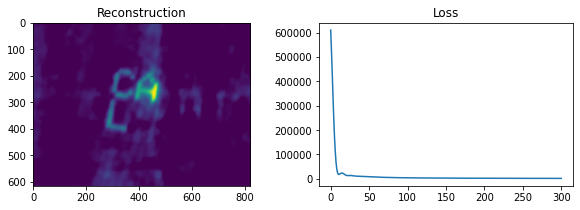

0.0017752166919120765 1.2992316436650936e-06
0.0017273698521475774 1.2992316436650936e-06
0.0025026159451211503 1.2992316436650936e-06
0.0025282610144272562 1.2992316436650936e-06
0.0017837917879458933 1.2992316436650936e-06
0.0017355480911248502 1.2992316436650936e-06
0.002514956027809623 1.2992316436650936e-06
0.0025405716346002336 1.2992316436650936e-06
0.0017923710084820092 1.2992316436650936e-06
0.0017437279391334833 1.2992316436650936e-06
0.0025273062652927157 1.2992316436650936e-06
0.0025528906528177416 1.2992316436650936e-06
0.001800954299311689 1.2992316436650936e-06
0.0017519093307881094 1.2992316436650936e-06
0.002539666539060605 1.2992316436650936e-06
0.0025652179523446617 1.2992316436650936e-06
0.001809541609591438 1.2992316436650936e-06
0.001760092201930401 1.2992316436650936e-06
0.0025520367322646987 1.2992316436650936e-06
0.002577553418732156 1.2992316436650936e-06
0.0018181328918545061 1.2992316436650936e-06
0.001768276490265772 1.2992316436650936e-06
0.002564416729171

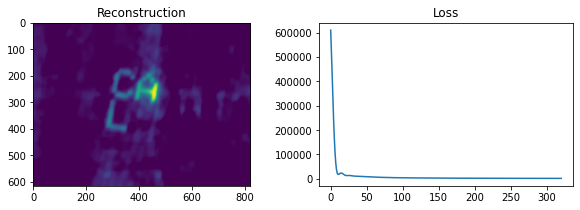

0.0019474500425423315 1.2992316436650936e-06
0.0018911705735550077 1.2992316436650936e-06
0.002751219357537471 1.2992316436650936e-06
0.002775944372735964 1.2992316436650936e-06
0.001956099261319743 1.2992316436650936e-06
0.0018993697158420817 1.2992316436650936e-06
0.0027637418623814784 1.2992316436650936e-06
0.0027884027964333114 1.2992316436650936e-06
0.0019647517663469683 1.2992316436650936e-06
0.00190756937107387 1.2992316436650936e-06
0.0027762724727990414 1.2992316436650936e-06
0.0028008676278808388 1.2992316436650936e-06
0.0019734075177842043 1.2992316436650936e-06
0.0019157695024018728 1.2992316436650936e-06
0.002788811103473721 1.2992316436650936e-06
0.0028133387853885978 1.2992316436650936e-06
0.0019820664758774097 1.2992316436650936e-06
0.00192397007523252 1.2992316436650936e-06
0.0028013576687922954 1.2992316436650936e-06
0.0028258618171394623 1.2992316436650936e-06
0.0019907286007819157 1.2992316436650936e-06
0.0019321710569621157 1.2992316436650936e-06
0.0028139120834292

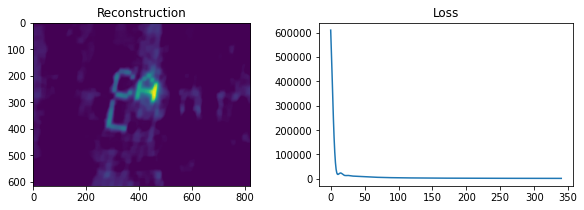

0.0021210153081159936 1.2992316436650936e-06
0.002055219497498349 1.2992316436650936e-06
0.0030031133462373556 1.2992316436650936e-06
0.003027129004626299 1.2992316436650936e-06
0.002129723223063063 1.2992316436650936e-06
0.002063424315611391 1.2992316436650936e-06
0.003015782054248422 1.2992316436650936e-06
0.003039758045557537 1.2992316436650936e-06
0.0021385074542287033 1.2992316436650936e-06
0.0020716292908241874 1.2992316436650936e-06
0.003028457220544223 1.2992316436650936e-06
0.0030523924994578125 1.2992316436650936e-06
0.0021474207863127473 1.2992316436650936e-06
0.002079834421903514 1.2992316436650936e-06
0.003041138766512397 1.2992316436650936e-06
0.003065032291986687 1.2992316436650936e-06
0.002156338790845382 1.2992316436650936e-06
0.002088039708498808 1.2992316436650936e-06
0.00305382661346732 1.2992316436650936e-06
0.003077677348751521 1.2992316436650936e-06
0.0021652614489329255 1.2992316436650936e-06
0.002096245150596776 1.2992316436650936e-06
0.0030665206823482062 1.29

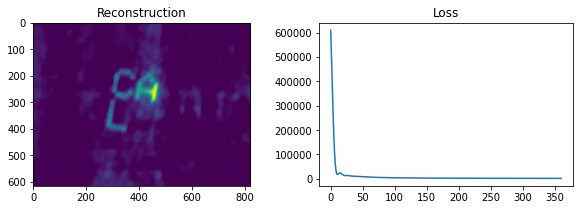

0.002299650617841666 1.2992316436650936e-06
0.0022193473291592155 1.2992316436650936e-06
0.0032576248018595833 1.2992316436650936e-06
0.003280653238097931 1.2992316436650936e-06
0.0023086461154860067 1.2992316436650936e-06
0.00222755568265756 1.2992316436650936e-06
0.0032704077660226415 1.2992316436650936e-06
0.0032933764089629262 1.2992316436650936e-06
0.0023176461066721533 1.2992316436650936e-06
0.0022357642523566494 1.2992316436650936e-06
0.003283195635903023 1.2992316436650936e-06
0.003306103521131776 1.2992316436650936e-06
0.0023266505877457696 1.2992316436650936e-06
0.0022439730428011565 1.2992316436650936e-06
0.0032959883380395565 1.2992316436650936e-06
0.003318834504624631 1.2992316436650936e-06
0.0023356595556043103 1.2992316436650936e-06
0.00225218205958426 1.2992316436650936e-06
0.0033087857998075564 1.2992316436650936e-06
0.003331569290131799 1.2992316436650936e-06
0.0023446730076167434 1.2992316436650936e-06
0.002260391309674465 1.2992316436650936e-06
0.003321587949082151 

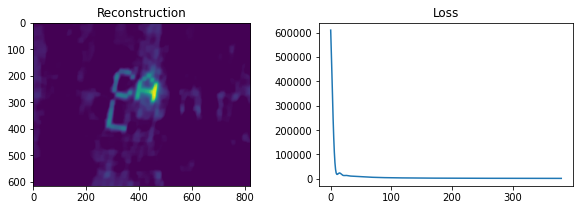

0.0024771938651653616 1.2992316436650936e-06
0.002385072113631384 1.2992316436650936e-06
0.0035141345803408573 1.2992316436650936e-06
0.003535787712393045 1.2992316436650936e-06
0.0024851599102551844 1.2992316436650936e-06
0.0023935794784766527 1.2992316436650936e-06
0.003527002159852154 1.2992316436650936e-06
0.0035485768222706772 1.2992316436650936e-06
0.0024929738782774806 1.2992316436650936e-06
0.0024020895883258377 1.2992316436650936e-06
0.0035398732454964507 1.2992316436650936e-06
0.003561368532799863 1.2992316436650936e-06
0.0025006365725591274 1.2992316436650936e-06
0.0024106024528103196 1.2992316436650936e-06
0.0035527477710912006 1.2992316436650936e-06
0.0035741627804618736 1.2992316436650936e-06
0.002508148788281385 1.2992316436650936e-06
0.002419118081684195 1.2992316436650936e-06
0.0035656256713151313 1.2992316436650936e-06
0.003586959502878295 1.2992316436650936e-06
0.0025155113127637457 1.2992316436650936e-06
0.0024276364849402073 1.2992316436650936e-06
0.003578506881941

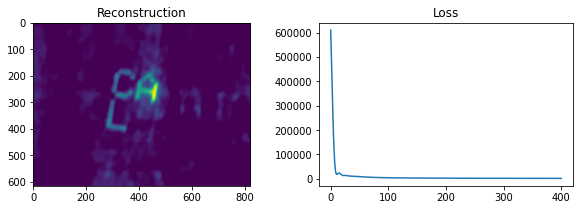

0.0026466329826225626 1.2992316436650936e-06
0.0025557543337625887 1.2992316436650936e-06
0.003772082087000817 1.2992316436650936e-06
0.0037865871437181326 1.2992316436650936e-06
0.002654734433373019 1.2992316436650936e-06
0.00256431902375196 1.2992316436650936e-06
0.0037850084330954873 1.2992316436650936e-06
0.003799323349926622 1.2992316436650936e-06
0.0026626803295191725 1.2992316436650936e-06
0.002572886749171171 1.2992316436650936e-06
0.0037979371610508033 1.2992316436650936e-06
0.0038120604621941514 1.2992316436650936e-06
0.002670471472072242 1.2992316436650936e-06
0.002581457528561822 1.2992316436650936e-06
0.003810868224378933 1.2992316436650936e-06
0.0038247984367849905 1.2992316436650936e-06
0.0026781086553764027 1.2992316436650936e-06
0.0025900313812003846 1.2992316436650936e-06
0.003823801577487836 1.2992316436650936e-06
0.003837537230784229 1.2992316436650936e-06
0.002685592667064378 1.2992316436650936e-06
0.0025986083271987686 1.2992316436650936e-06
0.0038367371754754686 

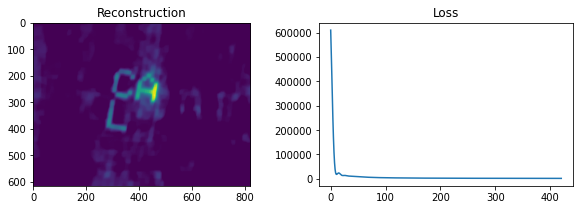

0.002779987421687695 1.2992316436650936e-06
0.0027276478573367673 1.2992316436650936e-06
0.004031013776721804 1.2992316436650936e-06
0.004050699213277512 1.2992316436650936e-06
0.002785122343876445 1.2992316436650936e-06
0.0027362771451736154 1.2992316436650936e-06
0.0040439802316759605 1.2992316436650936e-06
0.004064340814069237 1.2992316436650936e-06
0.0027914467778854296 1.2992316436650936e-06
0.0027449098951362453 1.2992316436650936e-06
0.004056948367946684 1.2992316436650936e-06
0.0040779896765232365 1.2992316436650936e-06
0.00280045818537952 1.2992316436650936e-06
0.002753546134225235 1.2992316436650936e-06
0.0040699181630421835 1.2992316436650936e-06
0.004091645770520897 1.2992316436650936e-06
0.0028094746490779027 1.2992316436650936e-06
0.002762185890226599 1.2992316436650936e-06
0.004082889595055933 1.2992316436650936e-06
0.004105309066489071 1.2992316436650936e-06
0.002818496194563792 1.2992316436650936e-06
0.0027708291916117983 1.2992316436650936e-06
0.004097219422519758 1.2

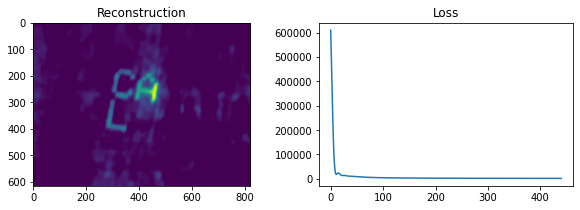

0.002954447111321579 1.2992316436650936e-06
0.0029009241195402332 1.2992316436650936e-06
0.004334469314913463 1.2992316436650936e-06
0.004324879620957328 1.2992316436650936e-06
0.002963553623651128 1.2992316436650936e-06
0.002909628216634038 1.2992316436650936e-06
0.004350367956159396 1.2992316436650936e-06
0.004338661419541325 1.2992316436650936e-06
0.0029726656913427706 1.2992316436650936e-06
0.002918336384842067 1.2992316436650936e-06
0.004366276557178543 1.2992316436650936e-06
0.0043524499866624735 1.2992316436650936e-06
0.0029817833440102734 1.2992316436650936e-06
0.0029270486569481996 1.2992316436650936e-06
0.004382195073020785 1.2992316436650936e-06
0.004366245303202368 1.2992316436650936e-06
0.002990906610565086 1.2992316436650936e-06
0.0029357650650774962 1.2992316436650936e-06
0.004398123459728105 1.2992316436650936e-06
0.004380047350400449 1.2992316436650936e-06
0.003000035519366746 1.2992316436650936e-06
0.0029444856408228663 1.2992316436650936e-06
0.004414061673849439 1.29

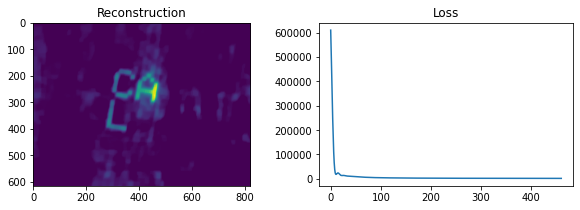

0.003137664565599379 1.2992316436650936e-06
0.0030758149689068923 1.2992316436650936e-06
0.00465428541409573 1.2992316436650936e-06
0.004601783124074283 1.2992316436650936e-06
0.0031468874008431422 1.2992316436650936e-06
0.003084606324570673 1.2992316436650936e-06
0.004670375206714027 1.2992316436650936e-06
0.004615697461732858 1.2992316436650936e-06
0.003156116329461532 1.2992316436650936e-06
0.0030934023550789865 1.2992316436650936e-06
0.0046864741477232056 1.2992316436650936e-06
0.004629618313440297 1.2992316436650936e-06
0.0031653513755057236 1.2992316436650936e-06
0.003102203087796236 1.2992316436650936e-06
0.004702582204029776 1.2992316436650936e-06
0.0046435456705423055 1.2992316436650936e-06
0.003174592563044355 1.2992316436650936e-06
0.003111008550130262 1.2992316436650936e-06
0.004718699343349734 1.2992316436650936e-06
0.004657479524436585 1.2992316436650936e-06
0.003183839916078685 1.2992316436650936e-06
0.0031198187694451264 1.2992316436650936e-06
0.0047348255339933 1.29923

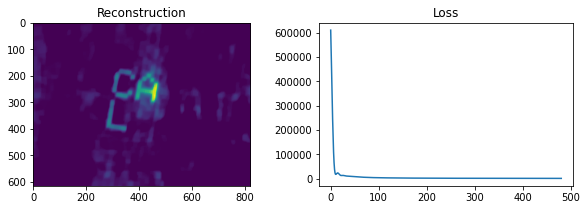

0.003323306535925012 1.2992316436650936e-06
0.0032525616517202964 1.2992316436650936e-06
0.0049777843972067005 1.2992316436650936e-06
0.004881297864881823 1.2992316436650936e-06
0.0033326558424018383 1.2992316436650936e-06
0.0032614517458531525 1.2992316436650936e-06
0.004994051465504195 1.2992316436650936e-06
0.004895340852799697 1.2992316436650936e-06
0.003342011718133334 1.2992316436650936e-06
0.0032703470579700674 1.2992316436650936e-06
0.005010327114071397 1.2992316436650936e-06
0.004909390174904351 1.2992316436650936e-06
0.003351374182431013 1.2992316436650936e-06
0.003279247610767029 1.2992316436650936e-06
0.005026611319599143 1.2992316436650936e-06
0.004923445820420148 1.2992316436650936e-06
0.0033607432545536436 1.2992316436650936e-06
0.0032881534268796304 1.2992316436650936e-06
0.0050429040588855075 1.2992316436650936e-06
0.004937507778191201 1.2992316436650936e-06
0.0033701189533512903 1.2992316436650936e-06
0.003297064528549255 1.2992316436650936e-06
0.005059205309055122 1.

In [10]:
img.run()

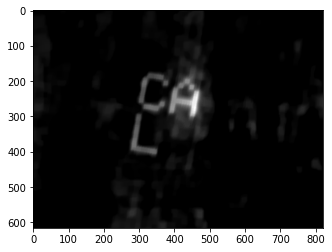

In [11]:
plt.imshow(img.fc_img, cmap='gray')